# <u>**Kaggle Competitions: Titanic**</u>

## <span style = 'color: red'>**Importing Stage**</span>

In [187]:
# import basic data cleaning libraries
import pandas as pd
import numpy as np
# hide warnings if max iteration time does not converge
import warnings
# data visualization (along with EDA stage)
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing (along with EDA stage)
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from scipy.stats import skew
# data splitting
from sklearn.model_selection import train_test_split
# statistic modeling
import statsmodels.api as sm
# for evaluation of statistical significance of categorical feature vs categorical target
from scipy.stats import chi2_contingency
# for evaluation of statistical significance of numeric feature vs categorical target
from scipy.stats import ttest_ind
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Inputing missing value
from sklearn.impute import SimpleImputer
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# model evaluation
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [188]:
warnings.filterwarnings('ignore')

## <span style = 'color: red'>**Importing Data**</span>

In [189]:
file = '../data/train.csv'
df = pd.read_csv(file)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <span style = 'color: red'>**Make Copy of Raw Data**</span>

In [190]:
df_clean = df.copy()
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <span style = 'color: red'>**Initial Data Cleaning & Feature Engineering**</span>

### a) Drop Irrelevant Features - <span style = 'color: yellow'>PassengerId</span>

In [191]:
# passengerId is irrelevant
df_clean = df_clean.drop(columns = ['PassengerId'])
df_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### <span style = 'color: green'><u>delete PassengerId since it just a continuous numbers without any meaning</u></span>

### b) Categorical Feature - <span style = 'color: yellow'>Pclass</span>

In [192]:
df_clean['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [193]:
df_clean['Pclass'].isna().sum()

np.int64(0)

Text(0.5, 1.0, 'Bar Plot for Different Pclass with Different Survival Rate')

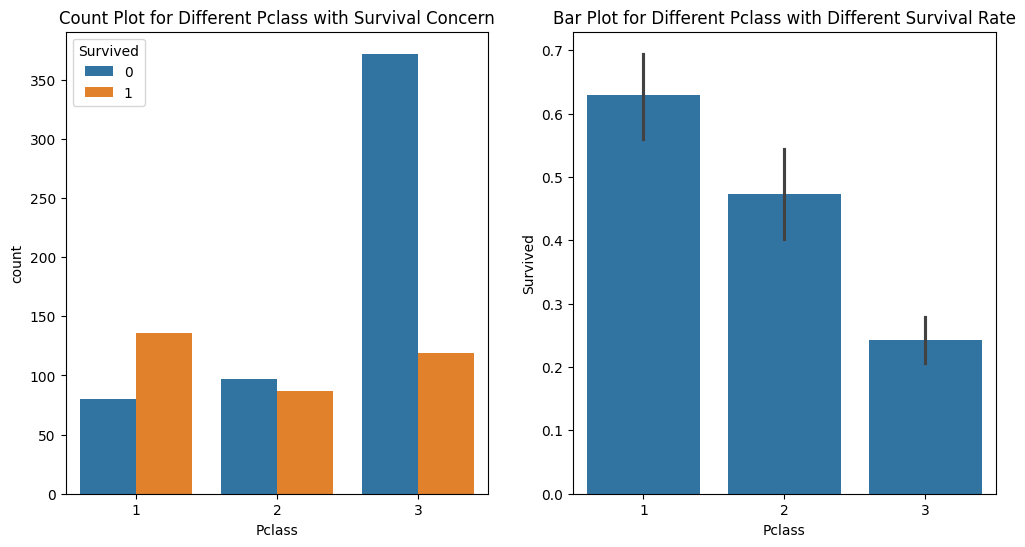

In [194]:
fig, ax = plt.subplots(1, 2, figsize = [12, 6])
sns.countplot(data = df_clean, x = 'Pclass', hue = 'Survived', ax = ax[0])
ax[0].set_title('Count Plot for Different Pclass with Survival Concern')
sns.barplot(data = df_clean, x = 'Pclass', y = 'Survived', ax = ax[1])
ax[1].set_title('Bar Plot for Different Pclass with Different Survival Rate')

In [195]:
contingency_table = pd.crosstab(df_clean['Pclass'], df_clean['Survived'])
contingency_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [196]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(chi2)
print(p_value)

102.88898875696056
4.549251711298793e-23


#### <span style = 'color: green'>From above plots, we can tell that Pclass has certain affect on target.</span>
#### <span style = 'color: green'>Also, from the p_value, we can tell that such feature is statistically significant</span>
#### <span style = 'color: green'><u>**Later use OneHotEncoder in Pipeline to convert it**</u></span>

### c) Seems Irrelevant Feature - <span style = 'color: yellow'>Name</span>

#### extract the prefix out of Name and see the pattern

In [197]:
# Name seems no statistical meaning to target, but we can extract the prefix out of it
df_clean['Title'] = df_clean['Name'].str.extract(r' ([A-Za-z]+)\.', expand = False)
df_clean.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [198]:
df_clean['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

#### from above table, we can tell that only 4 prefixes are used a lot

In [199]:
def change_prefix(title):
    common_prefix = ['Mr', 'Miss', 'Mrs', 'Master']
    if title in common_prefix:
        return title
    else:
        return 'Others'
df_clean['Title'] = df_clean['Title'].apply(change_prefix)
df_clean['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: count, dtype: int64

Text(0.5, 1.0, 'Bar Plot for Different Prefix with Different Survival Rate')

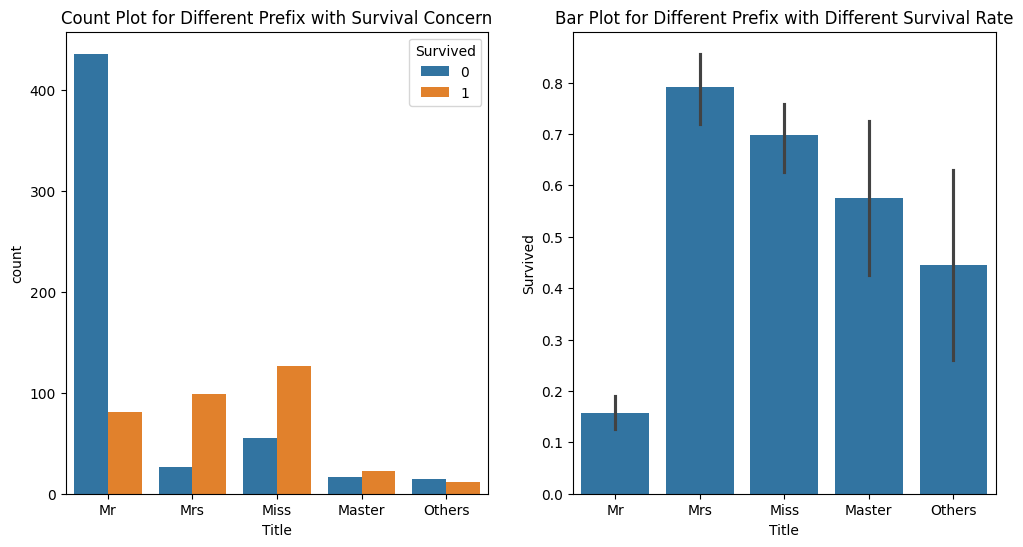

In [200]:
fig, ax = plt.subplots(1, 2, figsize = [12, 6])
sns.countplot(data = df_clean, x = 'Title', hue = 'Survived', ax = ax[0])
ax[0].set_title('Count Plot for Different Prefix with Survival Concern')
sns.barplot(data = df_clean, x = 'Title', y = 'Survived', ax = ax[1])
ax[1].set_title('Bar Plot for Different Prefix with Different Survival Rate')

In [201]:
contingency_table = pd.crosstab(df_clean['Title'], df_clean['Survived'])
contingency_table

Survived,0,1
Title,,
Master,17,23
Miss,55,127
Mr,436,81
Mrs,26,99
Others,15,12


In [202]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(chi2)
print(p_value)

283.3115089621979
4.3050360647309247e-60


#### <span style = 'color: green'>from above plots we can tell that p_value is extremely small</span>
#### <span style = 'color: green'>Title is worth keeping and for further modeling</span>
#### <span style = 'color: green'><u>**Later use OneHotEncoder in Pipeline to convert it**</u></span>

### d) Categorical Feature - <span style = 'color: yellow'>Sex</span>

Text(0.5, 1.0, 'Bar Plot for Different Sex with Different Survival Rate')

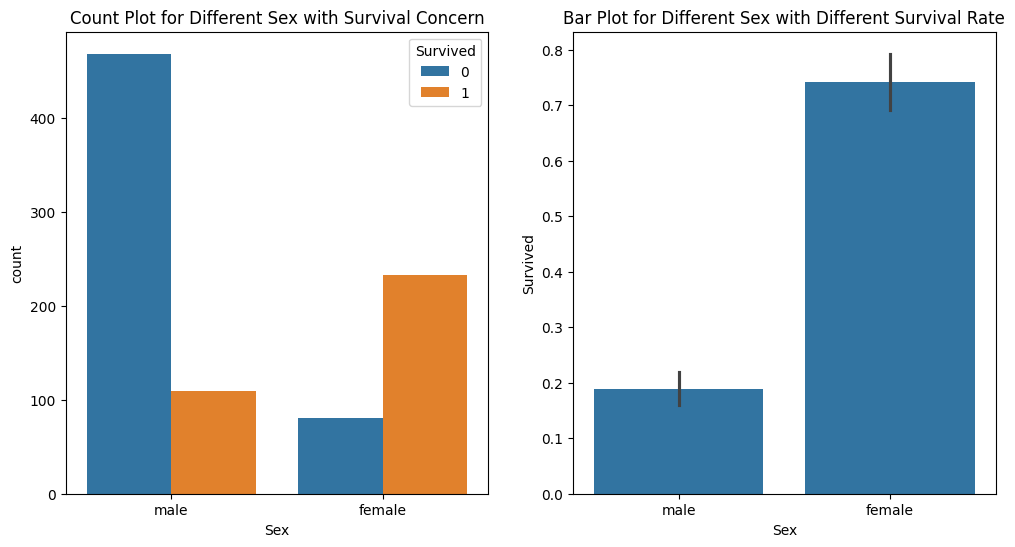

In [203]:
fig, ax = plt.subplots(1, 2, figsize = [12, 6])
sns.countplot(data = df_clean, x = 'Sex', hue = 'Survived', ax = ax[0])
ax[0].set_title('Count Plot for Different Sex with Survival Concern')
sns.barplot(data = df_clean, x = 'Sex', y = 'Survived', ax = ax[1])
ax[1].set_title('Bar Plot for Different Sex with Different Survival Rate')

In [204]:
contingency_table = pd.crosstab(df_clean['Sex'], df_clean['Survived'])
contingency_table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [205]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(chi2)
print(p_value)

260.71702016732104
1.197357062775565e-58


#### <span style = 'color: green'>from above plots we can tell that p_value is extremely small</span>
#### <span style = 'color: green'>Title is worth keeping and for further modeling</span>
#### <span style = 'color: green'><u>**Later use OneHotEncoder in Pipeline to convert it**</u></span>

### e) Numeric Feature - <span style = 'color: yellow'>Age</span>

In [206]:
df_clean['Age'].isna().sum()

np.int64(177)

Text(50, 90, 'Median value: 28.0')

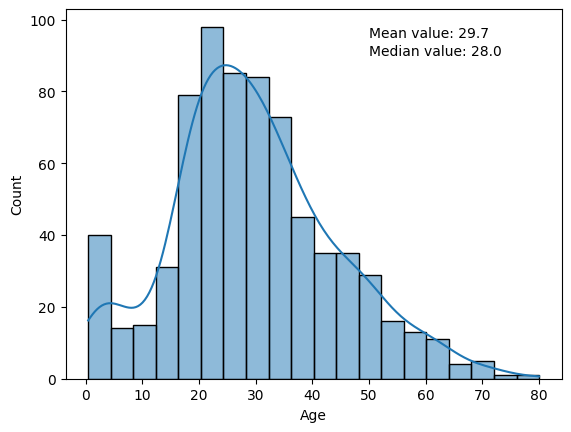

In [207]:
age_median = df_clean['Age'].median()
age_mean = df_clean['Age'].mean()
sns.histplot(data = df_clean, x = 'Age', kde = True)
plt.text(50, 95, f'Mean value: {round(age_mean, 2)}')
plt.text(50, 90, f'Median value: {age_median}')

#### check p_value

In [208]:
# see the relationship between age and survived using t-test
# split the numeric data into 2 groups
# t-test cannot have missing value
age_survived = df_clean[df_clean['Survived'] == 1]['Age'].dropna()
age_died = df_clean[df_clean['Survived'] == 0]['Age'].dropna()
# perform t-test
t_stat, p_value = ttest_ind(age_survived, age_died)
print(t_stat)
print(p_value)

-2.06668694625381
0.03912465401348248


#### <span style = 'color: green'>the age distribution is not normal-distributed, thus we have to input the median into missing value
#### <span style = 'color: green'>cannot input missing value before splitting. Or it is data leakage
#### <span style = 'color: green'><u>deal with missing value, right-skewness, and standardize in pipeline

In [209]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


### f) Numeric Feature - <span style = 'color: yellow'>SibSp & Parch</span>

In [210]:
df_clean[['SibSp', 'Parch']].isna().sum()

SibSp    0
Parch    0
dtype: int64

#### SibSp: siblings or spouses the passenger go on the titanic with / Parch: accompanies the passengers take with
#### combining these 2 and come up a new feature: FamilySize

In [211]:
df_clean['FamilySize'] = df['SibSp'] + df['Parch']
df_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0


#### from above table, we can see that FamilySize == 0 is that the passenger came alone
#### thus, one feature called isAlone shall be established so that we can see if passenger came alone has higher survival rate

In [212]:
def is_alone_check(familysize):
    if familysize == 0:
        return 1
    else:
        return 0
df_clean['IsAlone'] = df_clean['FamilySize'].apply(is_alone_check)
df_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0,1


In [213]:
# check statistical significance between FamilySize and Survived
family_size_survived = df_clean[df_clean['Survived'] == 1]['FamilySize']
family_size_died = df_clean[df_clean['Survived'] == 0]['FamilySize']
t_stat, p_value = ttest_ind(family_size_survived, family_size_died)
print(f't_stat for FamilySize vs. Survived is: {round(t_stat, 4)}')
print(f'p_value for FamilySize vs. Survived is: {round(p_value, 4)}')
# check statistical significance between IsAlone and Survived
alone_survived = df_clean[df_clean['Survived'] == 1]['IsAlone']
alone_died = df_clean[df_clean['Survived'] == 0]['IsAlone']
t_stat, p_value = ttest_ind(alone_survived, alone_died)
print(f't_stat for IsAlone vs. Survived is: {round(t_stat, 4)}')
print(f'p_value for IsAlone vs. Survived is: {round(p_value, 4)}')

t_stat for FamilySize vs. Survived is: 0.4962
p_value for FamilySize vs. Survived is: 0.6199
t_stat for IsAlone vs. Survived is: -6.193
p_value for IsAlone vs. Survived is: 0.0


#### <span style = 'color: green'>it turns out that FamilySize has little statistical significance on target
#### <span style = 'color: green'>meanwhile IsAlone has way lot significance on target
#### <span style = 'color: green'><u>**keep both for further modeling (check importance of features)**

### g) Object Feature - <span style = 'color: yellow'>Ticket</span>

In [214]:
df_clean['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [215]:
df_clean['Ticket'].isna().sum()

np.int64(0)

In [216]:
# find the ticket length
def ticket_length(ticket):
    return len(ticket)
df_clean['Ticket_length'] = df_clean['Ticket'].apply(ticket_length)

In [217]:
# check the statistical significance between numeric feature and categorical target
ticket_length_survived = df_clean[df_clean['Survived'] == 1]['Ticket_length']
ticket_length_died = df_clean[df_clean['Survived'] == 0]['Ticket_length']
t_stat, p_value = ttest_ind(ticket_length_survived, ticket_length_died)
print(t_stat)
print(p_value)

-1.6522792351033762
0.09883075295321256


In [218]:
df_clean['Ticket_length'].value_counts()

Ticket_length
6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Bar Plot for Ticket Length with Different Survival Rate')

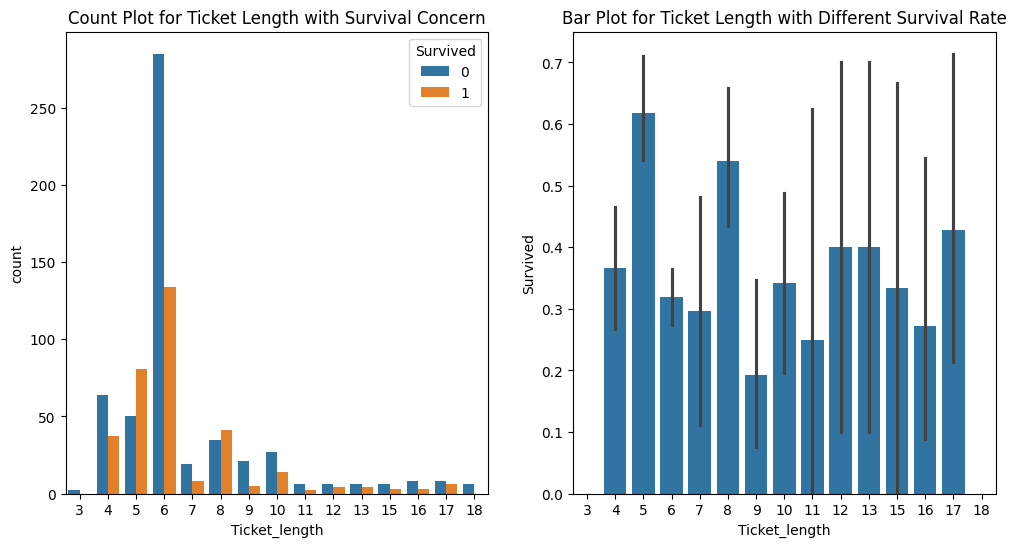

In [219]:
fig, ax = plt.subplots(1, 2, figsize = [12, 6])
sns.countplot(data = df_clean, x = 'Ticket_length', hue = 'Survived', ax = ax[0])
ax[0].set_title('Count Plot for Ticket Length with Survival Concern')
sns.barplot(data = df_clean, x = 'Ticket_length', y = 'Survived', ax = ax[1])
ax[1].set_title('Bar Plot for Ticket Length with Different Survival Rate')

#### <span style = 'color: green'>since p_value is slightly greater than threshold (p_value == 0.05), i decided to keep it
#### <span style = 'color: green'>see the importance of each feature then i will choose if such feature shall be disgarded

### h) Numeric Feature - <span style = 'color: yellow'>Fare</span>

In [220]:
df_clean['Fare'].isna().sum()

np.int64(0)

#### visualization and see Fare distribution

Text(100, 270, 'median value: 14.4542')

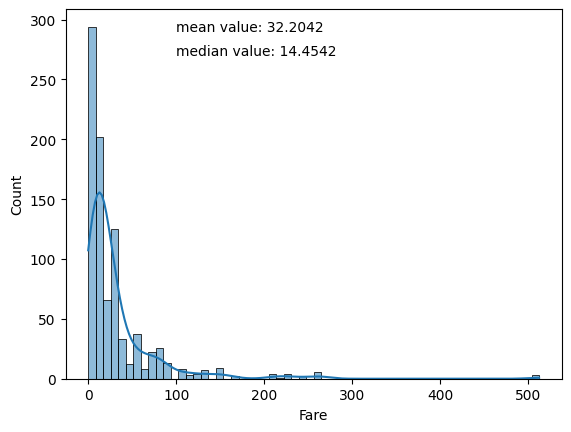

In [221]:
fare_mean = df_clean['Fare'].mean()
fare_median = df_clean['Fare'].median()
sns.histplot(data = df_clean, x = 'Fare', kde = True)
plt.text(100, 290, f'mean value: {round(fare_mean, 4)}')
plt.text(100, 270, f'median value: {fare_median}')

#### from above plot, we can tell the fare feature is extremely right-skewed.

In [222]:
fare_survived = df_clean[df_clean['Survived'] == 1]['Fare']
fare_died = df_clean[df_clean['Survived'] == 0]['Fare']
# perform t-test
t_stat, p_value = ttest_ind(fare_survived, fare_died)
print(t_stat)
print(p_value)

7.939191660871055
6.120189341924198e-15


#### <span style = 'color: green'>from above p_value, we can tell Fare is worth counting as one of the feature towards modeling
#### <span style = 'color: green'><u>deal with right-skewness, and standardize in pipeline

### i) Object Feature - <span style = 'color: yellow'>Cabin</span>

In [223]:
df_clean['Cabin'].isna().sum()

np.int64(687)

In [224]:
df_clean['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [225]:
df_clean['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [226]:
df_clean['Cabin_num'] = df_clean['Cabin'].str.extract(r'(^.)')
df_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Ticket_length,Cabin_num
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0,9,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0,8,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,16,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,6,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,0,1,6,NaN
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0,1,6,B
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,3,0,10,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0,1,6,C


In [227]:
contingency_table = pd.crosstab(df_clean['Cabin_num'], df_clean['Survived'])
contingency_table
# perform chi-squared test
chi2, p_value, dof,expected = chi2_contingency(contingency_table)
print(chi2)
print(p_value)

10.300556313502582
0.172171341282144


<Axes: xlabel='Cabin_num', ylabel='count'>

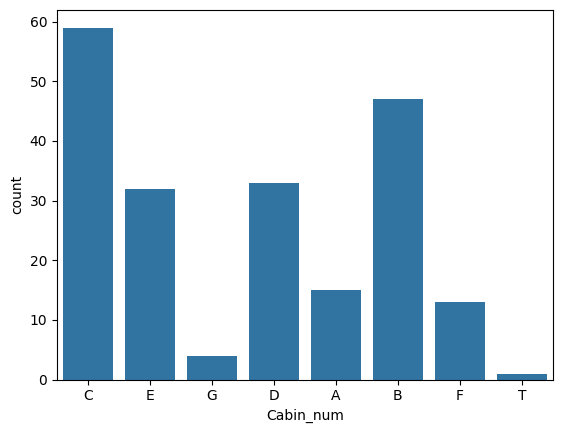

In [228]:
sns.countplot(data = df_clean, x = 'Cabin_num')

#### <span style = 'color: green'>from above statistical approach, it turns out that the missing value is too many
#### <span style = 'color: green'><u>**keep the feature (during pipeline use "most_frequent" value to fill missing values)**

### j) Object Feature - <span style = 'color: yellow'>Embarked</span>

In [229]:
df_clean['Embarked'].isna().sum()

np.int64(2)

#### 2 missing values in Embarked feature

In [230]:
df_clean['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Text(0.5, 1.0, 'Bar Plot for Embarkation with Different Survival Rate')

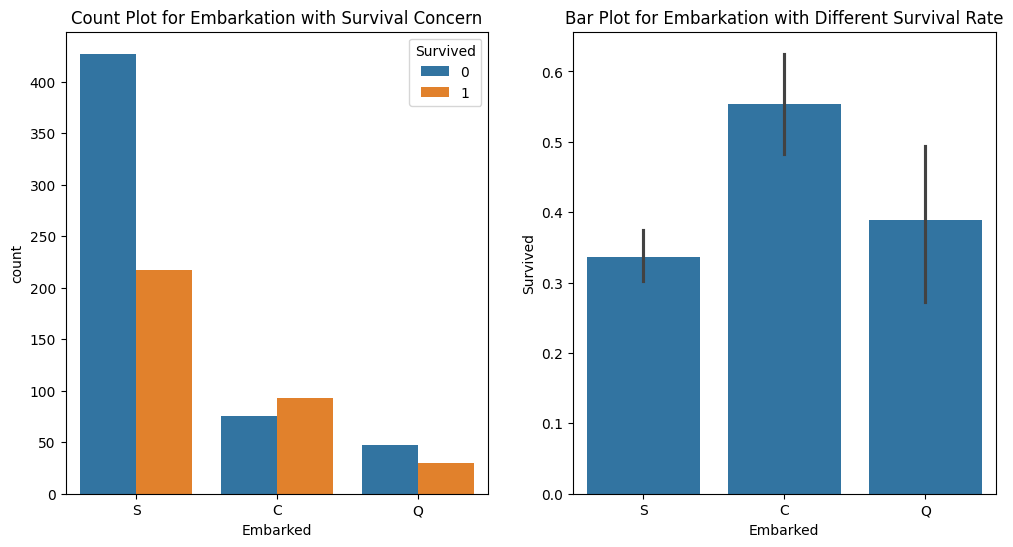

In [231]:
fig, ax = plt.subplots(1, 2, figsize = [12, 6])
sns.countplot(data = df_clean, x = 'Embarked', hue = 'Survived', ax = ax[0])
ax[0].set_title('Count Plot for Embarkation with Survival Concern')
sns.barplot(data = df_clean, x = 'Embarked', y = 'Survived', ax = ax[1])
ax[1].set_title('Bar Plot for Embarkation with Different Survival Rate')

In [232]:
contingency_table = pd.crosstab(df_clean['Embarked'], df_clean['Survived'])
# perform chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(chi2)
print(p_value)

26.48914983923762
1.769922284120912e-06


#### <span style = 'color: green'>from above plots and statistical point of view, such feature is statistically significant
#### <span style = 'color: green'><u>**deal with OneHotEncoder in pipeline**

In [233]:
df_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Ticket_length,Cabin_num
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0,9,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0,8,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,16,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,6,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,0,1,6,NaN
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0,1,6,B
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,3,0,10,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0,1,6,C


## <span style = 'color: red'>**Data Splitting (Training set & Validation set)**</span>

In [234]:
x_train, x_val = train_test_split(df_clean, test_size = 0.2)
print(x_train.shape)
print(x_val.shape)

(712, 16)
(179, 16)


In [235]:
x_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Ticket_length,Cabin_num
389,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C,Miss,0,1,7,NaN
238,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S,Mr,0,1,5,NaN
196,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q,Mr,0,1,6,NaN
430,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S,Mr,0,1,6,C
575,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S,Mr,0,1,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C,Mrs,1,0,5,B
453,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C,Mr,1,0,5,C
861,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S,Mr,1,0,5,NaN
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs,0,1,4,NaN


In [236]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 389 to 594
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       712 non-null    int64  
 1   Pclass         712 non-null    int64  
 2   Name           712 non-null    object 
 3   Sex            712 non-null    object 
 4   Age            567 non-null    float64
 5   SibSp          712 non-null    int64  
 6   Parch          712 non-null    int64  
 7   Ticket         712 non-null    object 
 8   Fare           712 non-null    float64
 9   Cabin          169 non-null    object 
 10  Embarked       710 non-null    object 
 11  Title          712 non-null    object 
 12  FamilySize     712 non-null    int64  
 13  IsAlone        712 non-null    int64  
 14  Ticket_length  712 non-null    int64  
 15  Cabin_num      169 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory usage: 94.6+ KB


In [237]:
y_train = x_train['Survived']
x_train = x_train.drop(columns = ['Survived'])
y_val = x_val['Survived']
x_val = x_val.drop(columns = ['Survived'])
print(x_train.shape)
print(x_val.shape)

(712, 15)
(179, 15)


## <span style = 'color: red'>**Pipeline**</span>

#### <span style = 'color: yellow'>**Preprocessor for <u>Logistic Regression Model</u> & <u>Random Forest Classifier</u>**
#### <u>OneHotEncoder</u>: Pclass, Sex, Embarked, Title
#### <u>Missing (median)</u>: Age
#### <u>Missing (most_frequent)</u>: Embarked
#### <u>PowerTransformer</u>: Age, Fare
#### <u>Standardize</u>: Age, Fare, FamilySize (ordinal numeric), Ticket_length (ordinal numeric)

In [238]:
# one_hot_features = ['Pclass', 'Sex', 'Embarked', 'Title']
# median_features = ['Age']
# freq_features = ['Embarked', 'Cabin_num']
# power_features = ['Age', 'Fare']
# scale_features = ['Age', 'Fare', 'FamilySize', 'Ticket_length']

power_features = ['Age', 'Fare']                                        # impute median missing value, fix skewness, and scale
scale_features = ['FamilySize', 'Ticket_length']                        # scale only
onehot_features = ['Pclass', 'Sex', 'Title', 'Embarked']                # impute most-frequent missing value, and onehot encoder
binary_feature = ['IsAlone']

preprocessor = ColumnTransformer (
    transformers = [
        ('power_scaler', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'median')),
            ('power', PowerTransformer())                               # standardize = True, method = 'yeo-johnson' by default
        ]), power_features),

        ('scaler', StandardScaler(), scale_features),

        ('onehot_encoder', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
        ]), onehot_features),

        ('binary', 'passthrough', binary_feature)
    ],
    remainder = 'drop'
)

In [239]:
# create the final model pipeline - logistic regression
logistic_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
# create the final model pipeline - random forest classifier
random_forest_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state = 42))
])

## <span style = 'color: red'>**GridSearchCV**</span>

In [240]:
# define the parameter grid for logistic regression model
logistic_param_grid = {
    'classifier__max_iter': [1000, 2000, 5000],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['saga'],
}

# define the parameter grid for random forest classifier
random_forest_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# set up GridSearchCV for logistic regression model
logistic_grid_search = GridSearchCV(
    estimator = logistic_model,
    param_grid = logistic_param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

# set up GridSearchCV for random forest classifier
random_forest_grid_search = GridSearchCV(
    estimator = random_forest_model,
    param_grid = random_forest_param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

# fir the grid search to your training data
logistic_grid_search.fit(x_train, y_train)
random_forest_grid_search.fit(x_train, y_train)

# see the best parameters and best score
print('**Logistic Regression Model**')
print('Best parameters: ', logistic_grid_search.best_params_)
print('Best cross-validation score: {:.4f}'.format(logistic_grid_search.best_score_))
print('**Random Forest Classifier**')
print('Best parameters: ', random_forest_grid_search.best_params_)
print('Best cross-validation score: {:.4f}'.format(random_forest_grid_search.best_score_))

# get the best model to use for prediction
best_logistic_model = logistic_grid_search.best_estimator_
best_random_forest_model = random_forest_grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
**Logistic Regression Model**
Best parameters:  {'classifier__C': 10, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best cross-validation score: 0.8314
**Random Forest Classifier**
Best parameters:  {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best cross-validation score: 0.8315


## <span style = 'color: red'>**Prediction**</span>

In [241]:
y_pred = best_logistic_model.predict(x_val)
print('**Logistic Regression Model**')
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print(classification_report(y_val, y_pred))

y_pred = best_random_forest_model.predict(x_val)
print('**Random Forest Classifier**')
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print(classification_report(y_val, y_pred))

**Logistic Regression Model**
Accuracy Score: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       119
           1       0.72      0.73      0.73        60

    accuracy                           0.82       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.82      0.82      0.82       179

**Random Forest Classifier**
Accuracy Score: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       119
           1       0.79      0.70      0.74        60

    accuracy                           0.84       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.84      0.84      0.84       179



## <span style = 'color: red'>**Feature Importance & Refine - Logistic Regression Model**</span>

In [242]:
# get the trained classifier
trained_logistic_model = best_logistic_model.named_steps['classifier']
print(trained_logistic_model)

# get coefficients (for binary classification, its a 1D array)
logistic_coefficients = trained_logistic_model.coef_[0]
print(logistic_coefficients)

# get feature names
logistic_feature_names = best_logistic_model.named_steps['preprocessor'].get_feature_names_out()
print(logistic_feature_names)

# create DataFrame using absolute values of coefficients
logistic_coef_df = pd.DataFrame({
    'Feature': logistic_feature_names,
    'Coefficient': logistic_coefficients,
    'Abs_Coefficient': np.abs(logistic_coefficients)
}).sort_values('Abs_Coefficient', ascending = False)
logistic_coef_df

LogisticRegression(C=10, max_iter=1000, solver='saga')
[-0.37653889  0.24236118 -0.8594888   0.06833035  0.92085156  0.16045362
 -0.90927217  1.54348157 -1.37144856  2.46848838 -0.70008049 -0.80504652
 -0.10096876 -0.69035961  0.29014881  0.07326855 -0.19138436 -0.31218527]
['power_scaler__Age' 'power_scaler__Fare' 'scaler__FamilySize'
 'scaler__Ticket_length' 'onehot_encoder__Pclass_1'
 'onehot_encoder__Pclass_2' 'onehot_encoder__Pclass_3'
 'onehot_encoder__Sex_female' 'onehot_encoder__Sex_male'
 'onehot_encoder__Title_Master' 'onehot_encoder__Title_Miss'
 'onehot_encoder__Title_Mr' 'onehot_encoder__Title_Mrs'
 'onehot_encoder__Title_Others' 'onehot_encoder__Embarked_C'
 'onehot_encoder__Embarked_Q' 'onehot_encoder__Embarked_S'
 'binary__IsAlone']


,Feature,Coefficient,Abs_Coefficient
9,onehot_encoder__Title_Master,2.468488,2.468488
7,onehot_encoder__Sex_female,1.543482,1.543482
8,onehot_encoder__Sex_male,-1.371449,1.371449
4,onehot_encoder__Pclass_1,0.920852,0.920852
6,onehot_encoder__Pclass_3,-0.909272,0.909272
2,scaler__FamilySize,-0.859489,0.859489
11,onehot_encoder__Title_Mr,-0.805047,0.805047
10,onehot_encoder__Title_Miss,-0.700080,0.700080
13,onehot_encoder__Title_Others,-0.690360,0.690360
0,power_scaler__Age,-0.376539,0.376539


## <span style = 'color: red'>**Feature Importance & Refine - Random Forest Classifier**</span>

In [243]:
# get the name of the model
trained_random_forest_model = best_random_forest_model.named_steps['classifier']
# get the feature importance
random_forest_importance = trained_random_forest_model.feature_importances_
# get the name of features from preprocessor
random_forest_feature_names = best_random_forest_model.named_steps['preprocessor'].get_feature_names_out()
# create DataFrame using absolute values of coefficients
coef_df = pd.DataFrame({
    'Feature': random_forest_feature_names,
    'Importance': random_forest_importance,
}).sort_values('Importance', ascending = False)

Text(0.5, 1.0, 'Feature Importance')

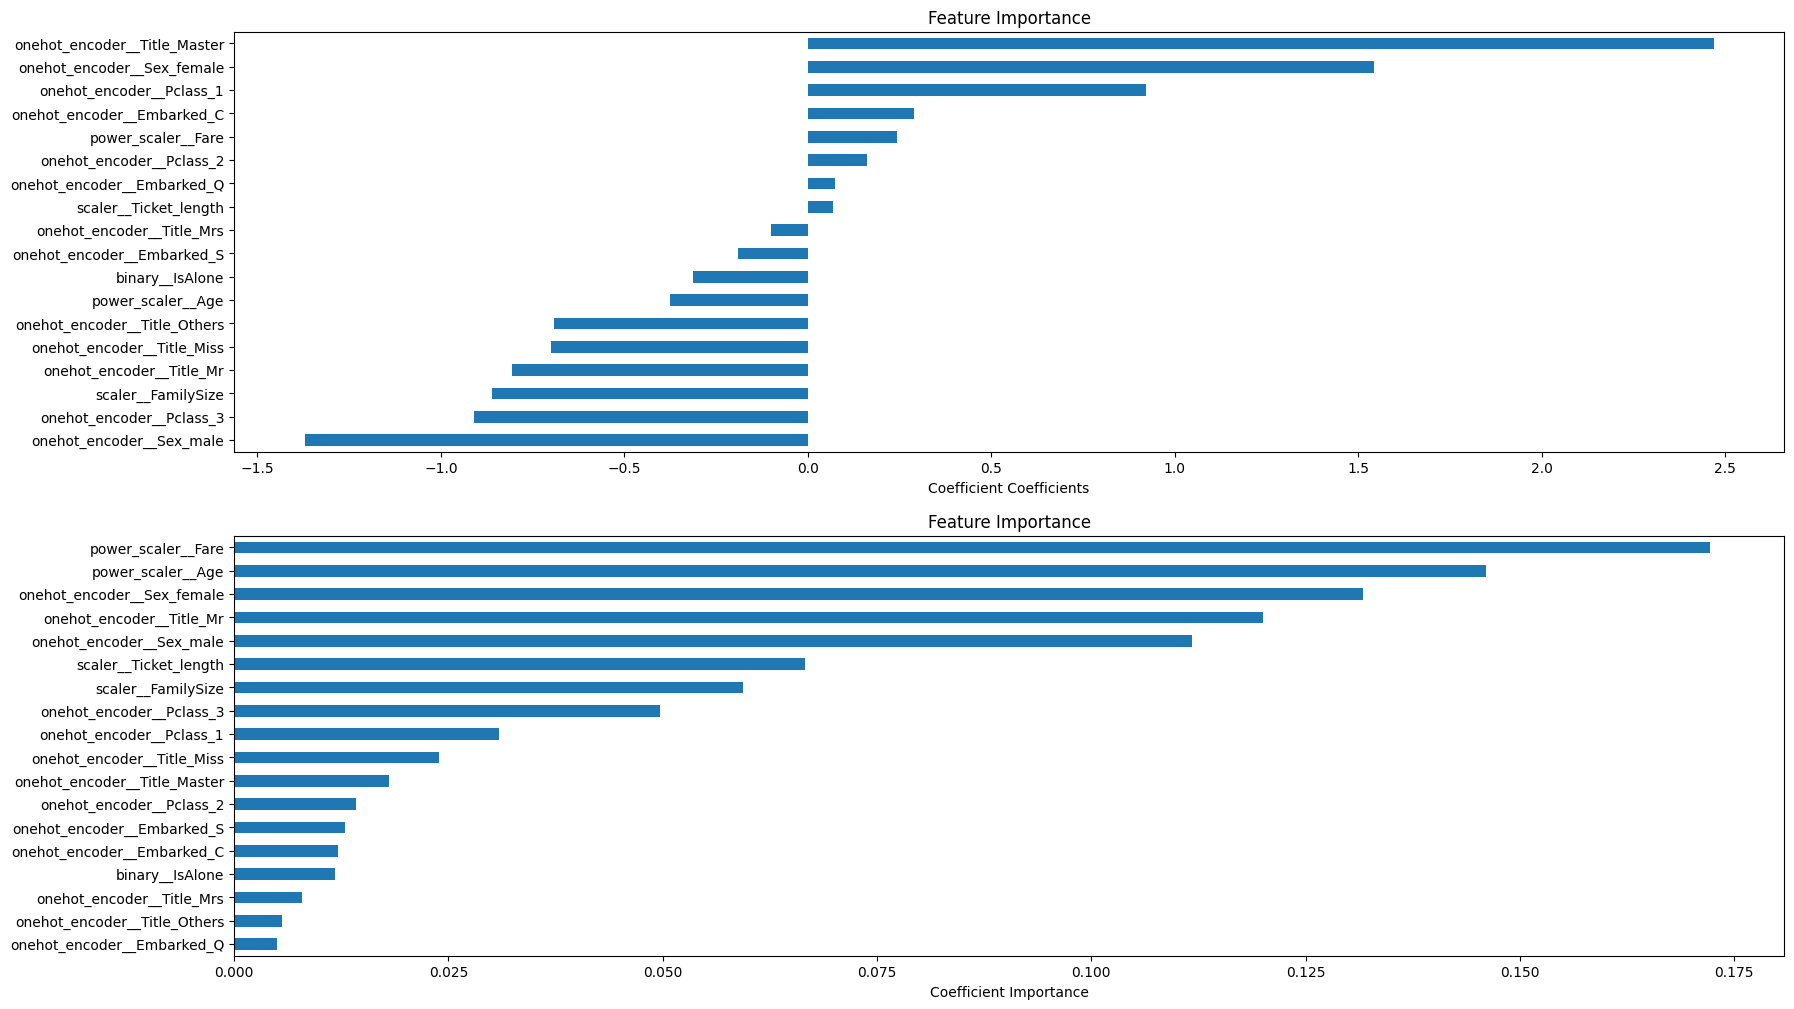

In [244]:
# plotting feature importance
logistic_coefficients = pd.Series(logistic_coefficients, index = logistic_feature_names)
random_forest_coefficients = pd.Series(random_forest_importance, index = random_forest_feature_names)

fig, ax = plt.subplots(2, 1, figsize = [20, 12])
logistic_coefficients.sort_values().plot(kind = 'barh', ax = ax[0])
ax[0].set_xlabel('Coefficient Coefficients')
ax[0].set_title('Feature Importance')
random_forest_coefficients.sort_values().plot(kind = 'barh', ax = ax[1])
ax[1].set_xlabel('Coefficient Importance')
ax[1].set_title('Feature Importance')

## <span style = 'color: red'>**Feature Engineering on test.csv file**</span>

#### Combine <u>SibSp</u> & <u>Parch</u>: <span style = 'color: yellow'><u>**FamilySize**</u>
#### Check <u>FamilySize</u> if the passenger is alone: <span style = 'color: yellow'><u>**IsAlone**</u>
#### Extract prefix from <u>Name</u>: <span style = 'color: yellow'><u>**Title**</u>
#### Estimate the <u>Ticket</u> length: <span style = 'color: yellow'><u>**Ticket_length**</u>

In [245]:
# load the unseen kaggle test data
test_data_file = '../data/test.csv'
df = pd.read_csv(test_data_file)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Make a copy from original test csv file so that the feature can remain the same as original

In [246]:
test_df = df.copy()

In [247]:
# FamilySize
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']
# IsAlone
test_df['IsAlone'] = test_df['FamilySize'].apply(is_alone_check)
# Title
test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand = False)
test_df['Title'] = test_df['Title'].apply(change_prefix)
# Ticket_length
test_df['Ticket_length'] = test_df['Ticket'].apply(ticket_length)

## <span style = 'color: red'>**Prediction on test.csv file**</span>

In [248]:
final_predictions = best_random_forest_model.predict(test_df)
# create the submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': df['PassengerId'],
    'Survived': final_predictions
})
# save to csv file
submission_df.to_csv('../submissions/titanic_submission_SammiWang.csv', index = False)
print('Submission is ready!')

Submission is ready!
